In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

In [6]:
dice = pd.DataFrame([1,2,3,4,5,6])

In [9]:
sum_of_dice = dice.sample(2, replace=True).sum().loc[0]
print('Sum of dice is: ', sum_of_dice)

Sum of dice is:  9


In [10]:
#Rolling dice in Python - 50 Times
trial = 50
result = [dice.sample(2, replace=True).sum().loc[0] for i in range(trial)]
result[:10] #Primeras 10 observaciones

[5, 11, 5, 8, 12, 7, 6, 7, 9, 10]

In [11]:
#Frecuencia
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
sort_freq

0
3     3
4     6
5     6
6     3
7     4
8     8
9     7
10    6
11    6
12    1
Name: count, dtype: int64

<Axes: xlabel='0'>

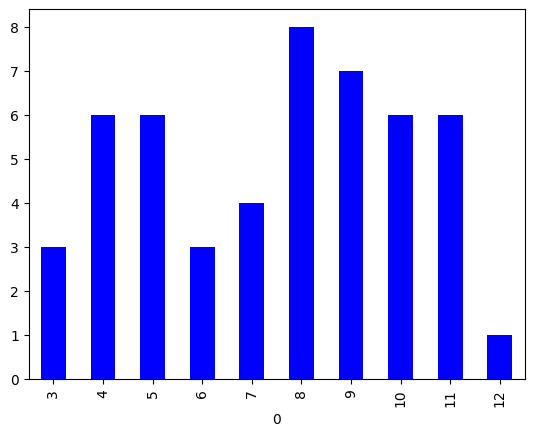

In [13]:
sort_freq.plot(kind='bar', color='blue')

<Axes: xlabel='0'>

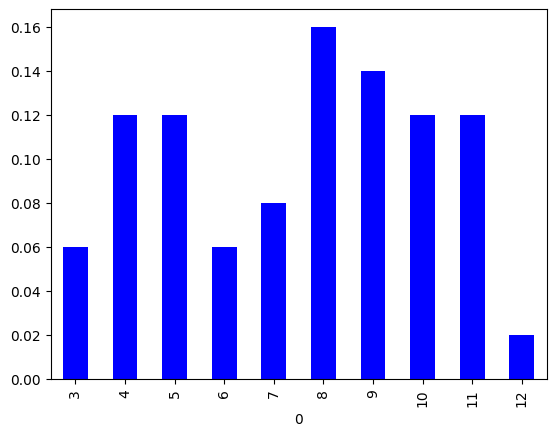

In [14]:
#Frecuencia Relativa
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue')

<Axes: xlabel='0'>

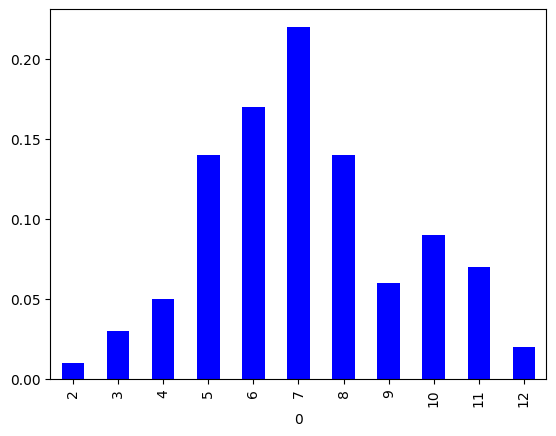

In [16]:
#Ensayo de 100
trial = 100
result = [dice.sample(2, replace=True).sum().loc[0] for i
          in range(trial)]
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/sort_freq.sum()
relative_freq.plot(kind='bar', color='blue')

In [20]:
x_distri = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11,12])
x_distri['Prob'] = [1,2,3,4,5,6,5,4,3,2,1]
x_distri['Prob'] = x_distri['Prob']/36
x_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [19]:
#MEDIA Y VARIANZA DE UNA DISTRIBUCIÓN
mean = (x_distri.index*x_distri['Prob']).sum()
var = (((x_distri.index-mean)**2)*x_distri['Prob']).sum()
print(mean,var)

6.999999999999998 5.833333333333333


In [37]:
appl = pd.DataFrame(pd.read_csv('APPL.csv'))
appl

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,03.07.2024,"221,55","220,00","221,55","219,03","37,36M","0,58%"
1,02.07.2024,"220,27","216,15","220,38","215,10","58,05M","1,62%"
2,01.07.2024,"216,75","212,09","217,51","211,92","60,40M","2,91%"
3,28.06.2024,"210,62","215,77","216,07","210,30","82,54M","-1,63%"
4,27.06.2024,"214,10","214,69","215,74","212,35","49,77M","0,40%"
...,...,...,...,...,...,...,...
3141,09.01.2012,"15,06","15,20","15,28","15,05","394,02M","-0,20%"
3142,06.01.2012,"15,09","14,99","15,10","14,97","318,39M","1,07%"
3143,05.01.2012,"14,93","14,82","14,95","14,74","271,27M","1,08%"
3144,04.01.2012,"14,77","14,64","14,81","14,62","260,24M","0,54%"


In [56]:
fechas = appl.loc['03.01.2012':'31.12.2013', 'Último']

In [57]:
appl['LogReturn'] = np.log(appl['Último']).shift(-1) - np.log(appl['Último'])
appl['LogReturn'].hist(bins=50)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method